<a href="https://colab.research.google.com/github/Ankith-1501/Titanic-Survival-Analysis-An-Exploratory-Data-Analysis-Project/blob/main/Titanic_Survival_Analysis_An_Exploratory_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Analysis: An Exploratory Data Analysis Project**

**Goal:** Predict the survival of passengers aboard the Titanic based on various features such as age, sex, passenger class, and more.

**Features:**

*   Survived: Whether the passenger survived (1) or not (0).
*   Pclass: Passenger class (1, 2, 3).
*   Name: Name of the passenger.
*   Sex: Gender of the passenger.
*   Age: Age of the passenger.
*   SibSp: Number of siblings/spouses aboard.
*   Parch: Number of parents/children aboard.
*   Fare: Fare paid for the ticket.
*   Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
# Load Titanic dataset from URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows to understand the structure
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning:**

In [33]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
# Fill missing 'Age' with the median value, 'Embarked with most common value and drop 'Cabin' due to too many missing values
df.fillna(df['Age'].median(), inplace=True)
df.fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

In [35]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Feature Engineering**

In [45]:
df['FamilySize'] = df['SibSp'] + df['Parch']

# Create 'AgeCategory' feature
def age_category(age):
    if age < 18:
        return 'Child'
    elif 18 <= age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeCategory'] = df['Age'].apply(age_category)

In [46]:
# Extract 'Title' from 'Name'
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [47]:
print(df.head())

   PassengerId      Survived  Pclass  \
0            1  Not Survived       3   
1            2      Survived       1   
2            3      Survived       3   
3            4      Survived       1   
4            5  Not Survived       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize AgeCategory Title  
0      0         A/5 21171   7.2500        S           1       Adult    Mr  
1      0          PC 17599  71.2833        C           1       Adult   Mrs  
2      0  STON/O2. 3101282   7.9250        S           0       Ad

**Exploratory Data Analysis (EDA):**



*   **Univariate Analysis**: Distribution of Age and Fare.



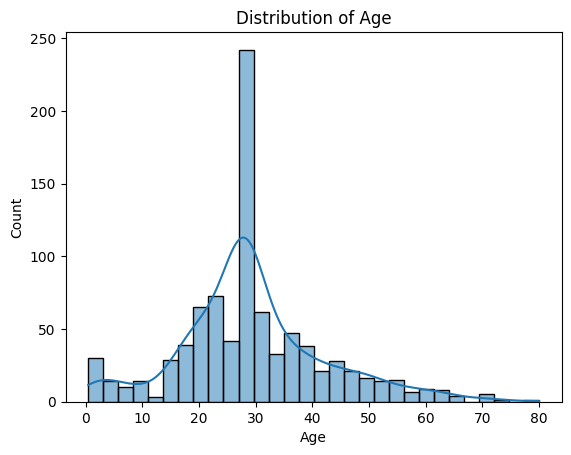

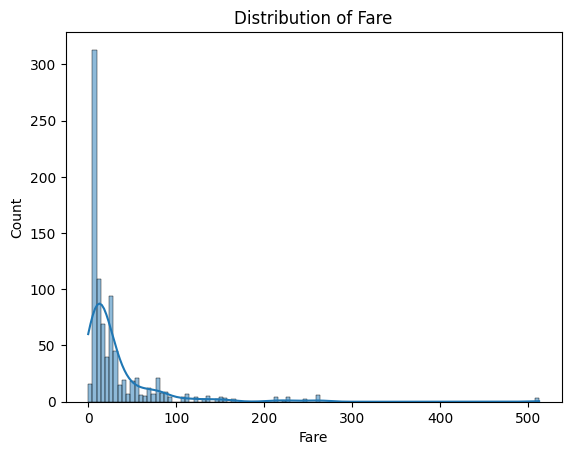

In [36]:
# Distribution of 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of 'Fare'
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()




*   **Bivariate Analysis**: Survival rate based on Pclass, Sex, etc.


In [38]:
#Replace Servived value from 0 and 1 to Survived and Not Servived
df['Survived'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})

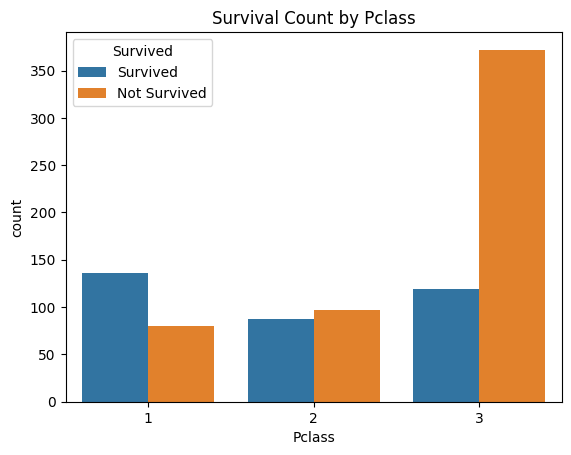

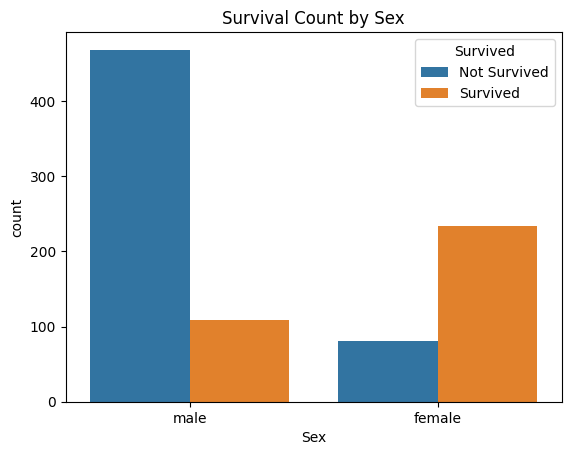

In [39]:
# Survived vs Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()

# Survived vs Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()




*   **Correlation Heatmap**


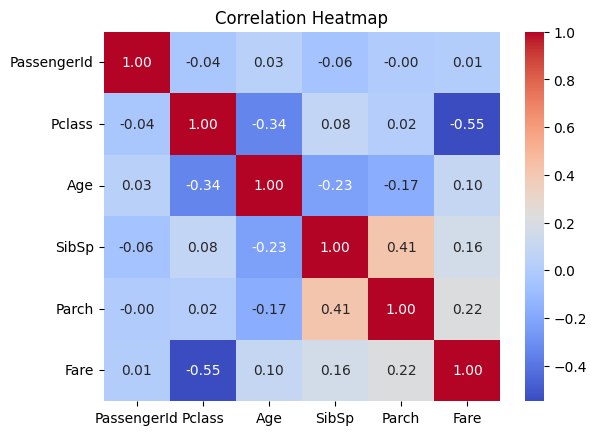

In [41]:
# Correlation matrix
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
corr = numerical_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


* **Pairplot**





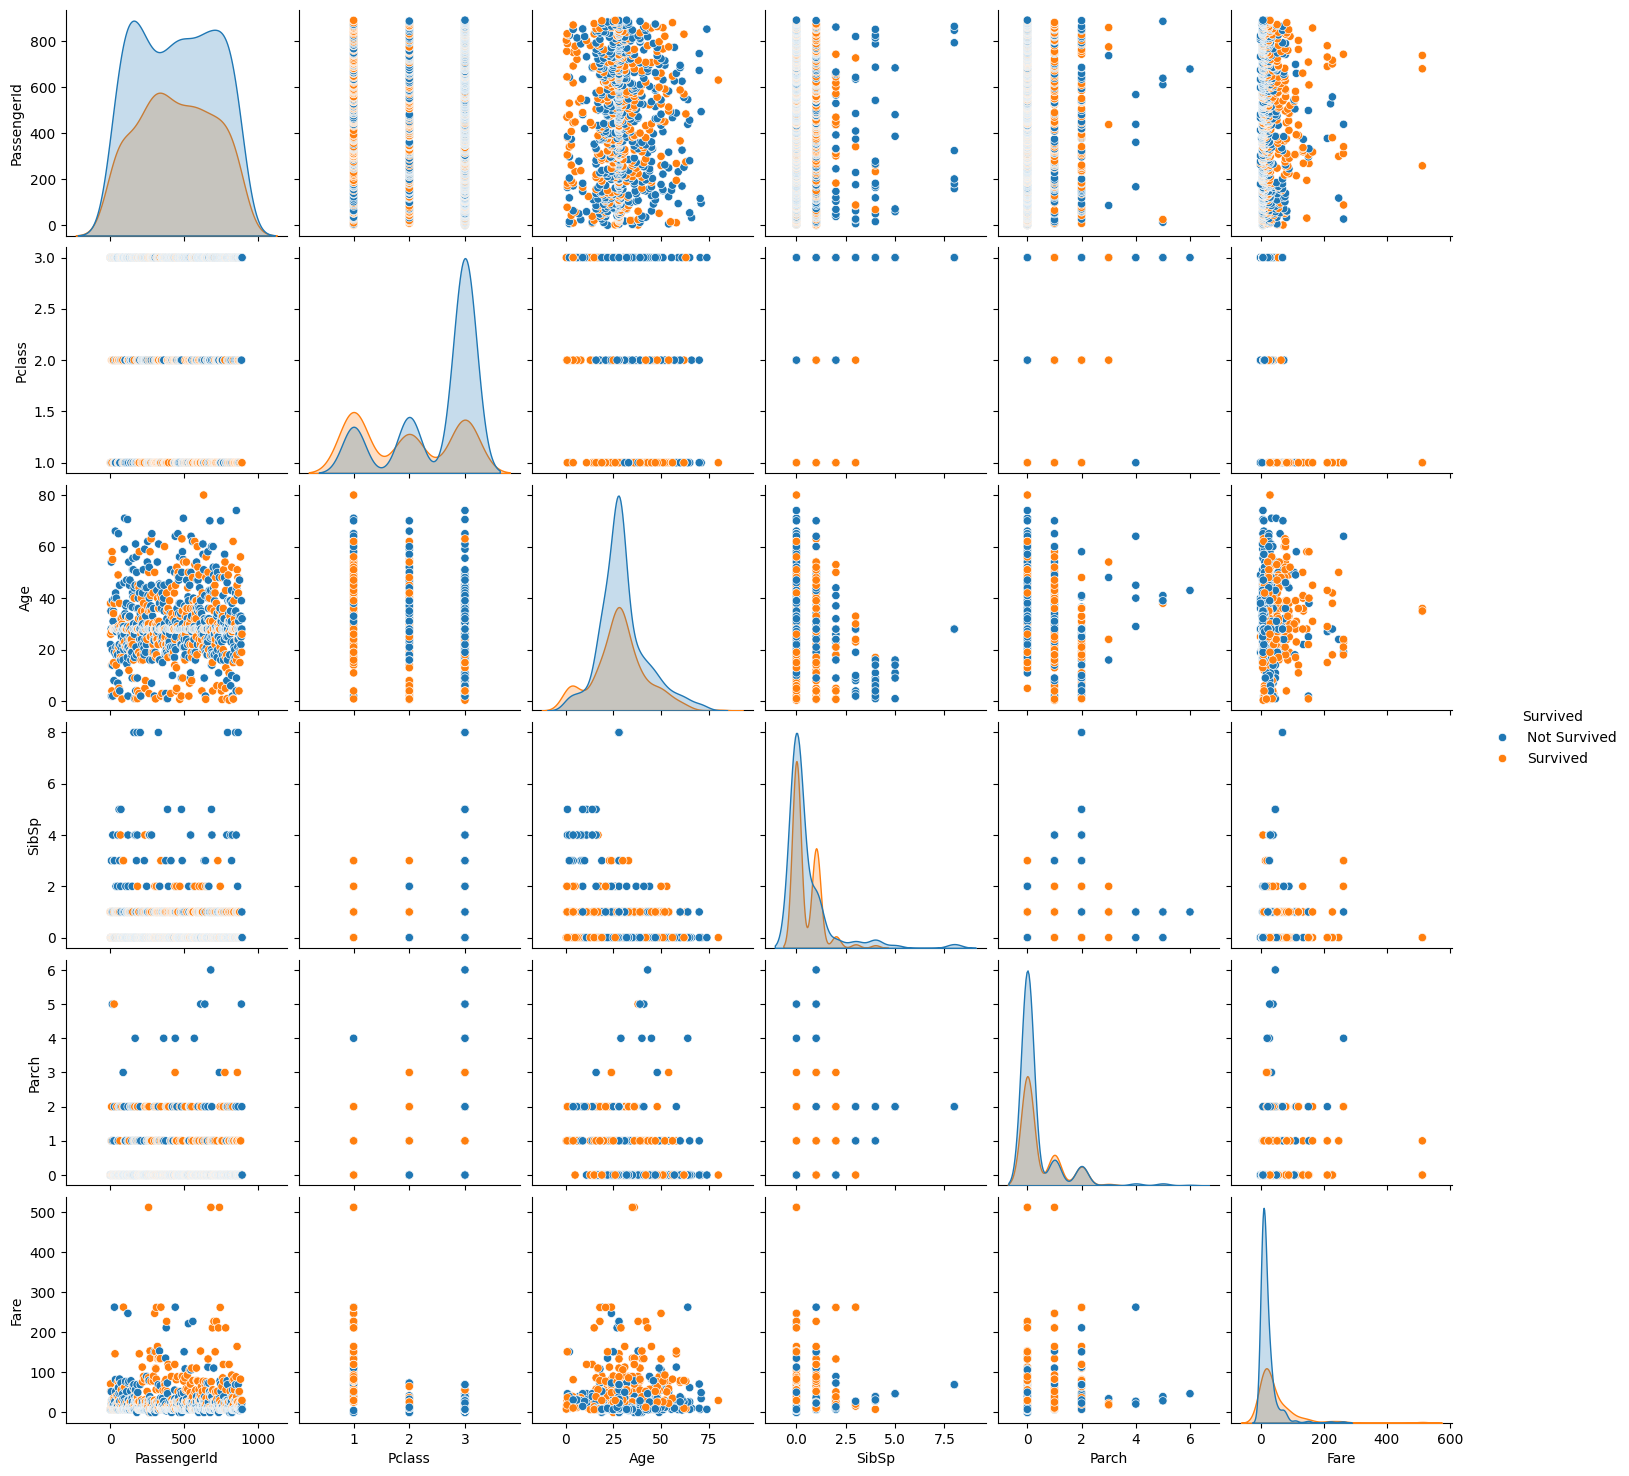

In [42]:
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()




*   **Violin Plot**



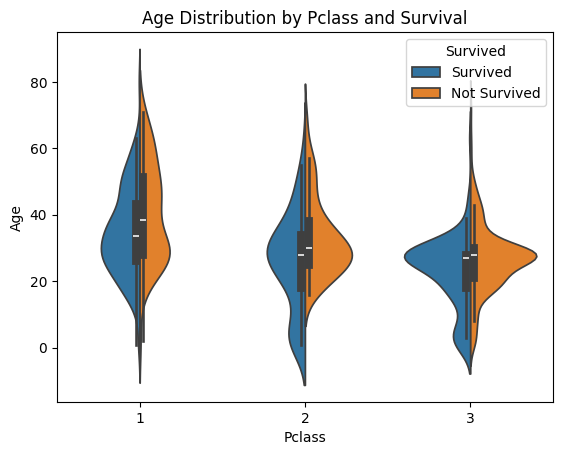

In [43]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True, data=df)
plt.title('Age Distribution by Pclass and Survival')
plt.show()




*   **Stacked Bar Plot**



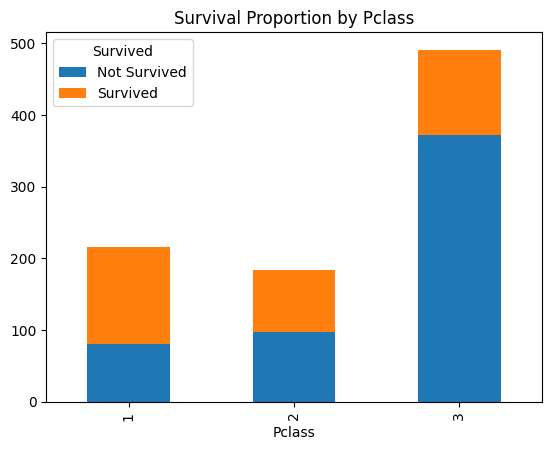

In [44]:
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', stacked=True)
plt.title('Survival Proportion by Pclass')
plt.show()


**Statistical Analysis**


*   **Chi-Square Test**: To check if there’s a significant relationship between categorical features (e.g., Sex, Pclass, Embarked) and survival.



In [48]:
from scipy.stats import chi2_contingency

# Chi-Square test for 'Survived' vs 'Sex'
contingency_table = pd.crosstab(df['Survived'], df['Sex'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2}, P-value: {p}')


Chi-Square Statistic: 260.71702016732104, P-value: 1.1973570627755645e-58




*   **T-Test**: To compare means of numerical features (e.g., Age, Fare) for survivors and non-survivors.



In [51]:
from scipy.stats import ttest_ind

# T-test for 'Age' between survivors and non-survivors
survived = df[df['Survived'] == 'Survived']['Age']
non_survived = df[df['Survived'] == 'Not Survived']['Age']
t_stat, p_value = ttest_ind(survived, non_survived)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -1.9394659179476366, P-value: 0.0527606884758555


# **Key Insights**

1. Gender:

  * Female passengers had a survival rate of (74%), compared to (19%) for males. This reflects the "women and children first" policy.

2. Class:

  * First-class passengers had the highest survival rate (63%), while third-class passengers had the lowest (24%).

3. Age:

  * Children (<18) had a higher survival rate (59%) compared to adults and seniors.

4. Family Size:

  * Passengers with family members aboard were more likely to survive than those traveling alone.

5. Fare:

  * Higher fares were associated with better survival chances, indicating socio-economic influence.